In [10]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import warnings
from scipy.spatial import ConvexHull
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
from adjustText import adjust_text

In [11]:
complex_tone_names =  ['C4', 'D4', 'E4', 'Fs4_Gb4', 'G4', 'Gs4_Ab4', 'A4', 'Cs5_Db5', 'Ds5_Eb5'] 
dir_complexTone = '/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/8. Similarity in PA task/data/processed_12-15-data/complexTone_rating.csv' 

new_complex_tone_names = ['C4', 'D4', 'E4', 'F#4', 'G4', 'G#4', 'A4', 'C#5', 'D#5']

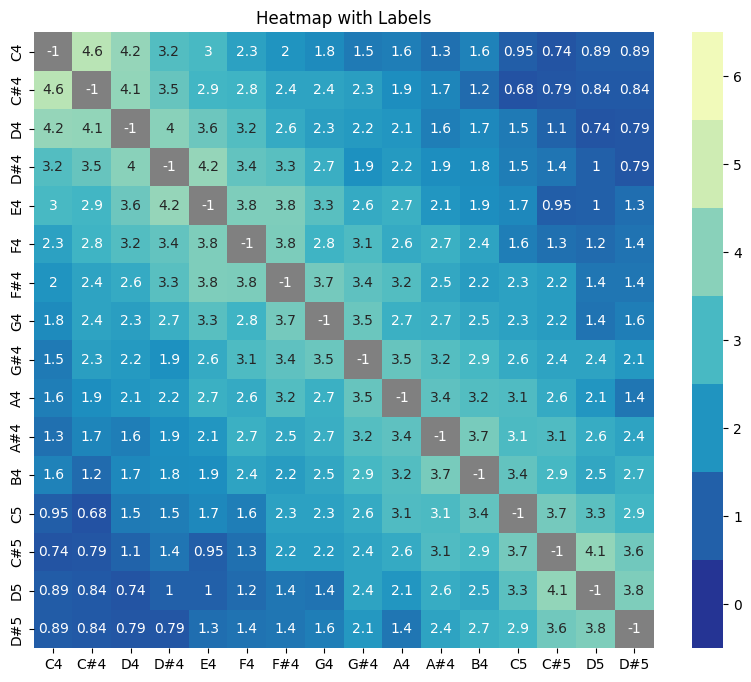

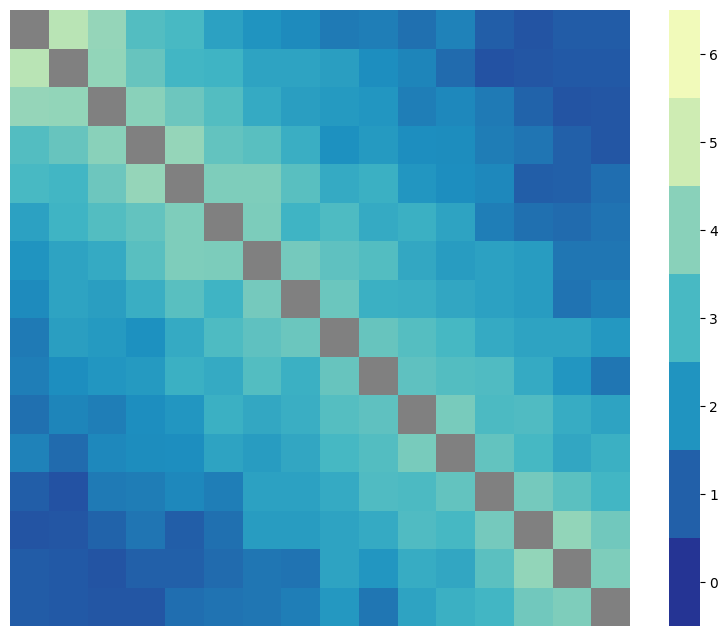

In [12]:
# Load the CSV file
df = pd.read_csv(dir_complexTone)

# Old to new complex tone names mapping
old_to_new_names = {
    'C4': 'C4', 'D4': 'D4', 'E4': 'E4',
    'Fs4_Gb4': 'F#4', 'G4': 'G4', 'Gs4_Ab4': 'G#4',
    'A4': 'A4', 'Cs5_Db5': 'C#5', 'Ds5_Eb5': 'D#5',
    'As4_Bb4': 'A#4', 'Cs4_Db4':'C#4', 'Ds4_Eb4':'D#4'
}

# Function to replace old complex tone names with new names and remove '.wav'
def rename_tone(tone_name_with_ext):
    tone_name = tone_name_with_ext.replace('.wav', '')  # Remove the extension
    return old_to_new_names.get(tone_name, tone_name)  # Rename tone

# Rename tones in 'Spreadsheet: A' and 'Spreadsheet: B'
df['Spreadsheet: A'] = df['Spreadsheet: A'].apply(rename_tone)
df['Spreadsheet: B'] = df['Spreadsheet: B'].apply(rename_tone)

# Define the correct order of the notes from low to high
notes_order = ['C4','C#4', 'D4', 'D#4','E4', 'F4', 'F#4', 'G4', 'G#4', 'A4', 'A#4', 'B4','C5', 'C#5', 'D5','D#5']

# Function to replace old complex tone names with new names and remove '.wav'
def rename_tone(tone_name_with_ext):
    tone_name = tone_name_with_ext.replace('.wav', '')  # Remove the extension
    return old_to_new_names.get(tone_name, tone_name)  # Rename tone

# Rename tones in 'Spreadsheet: A' and 'Spreadsheet: B'
df['Spreadsheet: A'] = df['Spreadsheet: A'].apply(rename_tone)
df['Spreadsheet: B'] = df['Spreadsheet: B'].apply(rename_tone)

# Flip the ratings
df['Flipped Response'] = 6 - df['Response']

# Create a dataframe to hold the average rating for each combination
ratings_matrix = pd.DataFrame(
    -np.ones((len(notes_order), len(notes_order))),  # Start with -1 for all entries
    index=notes_order, 
    columns=notes_order
)

# Populate the matrix with average ratings
for i, tone_a in enumerate(notes_order):
    for j, tone_b in enumerate(notes_order):
        if i != j:
            # Get the average rating for this combination
            mask = (
                ((df['Spreadsheet: A'] == tone_a) & (df['Spreadsheet: B'] == tone_b)) | 
                ((df['Spreadsheet: A'] == tone_b) & (df['Spreadsheet: B'] == tone_a))
            )
            ratings = df.loc[mask, 'Flipped Response']
            avg_rating = ratings.mean() if not ratings.empty else -1
            ratings_matrix.at[tone_a, tone_b] = avg_rating
            ratings_matrix.at[tone_b, tone_a] = avg_rating  # Symmetric entry

# Define a custom colormap from blue to green
colors_heatmap = plt.cm.YlGnBu(np.linspace(1, 0.1, 256))
colors_heatmap[0] = [0.5, 0.5, 0.5, 1]  # RGB for gray with full opacity
cmap = mcolors.LinearSegmentedColormap.from_list('custom_heatmap', colors_heatmap)

# Plot the heatmap with labels and custom colormap
plt.figure(figsize=(10, 8))
sns.heatmap(ratings_matrix, annot=True, cmap=cmap, vmin=-1, vmax=6, 
            cbar_kws={'ticks': [0, 1, 2, 3, 4, 5, 6], 'boundaries': np.arange(-0.5, 7, 1)})
plt.title('Heatmap with Labels')
plt.show()

# Plot the heatmap without labels and with the same custom colormap
plt.figure(figsize=(10, 8))
sns.heatmap(ratings_matrix, cmap=cmap, vmin=-1, vmax=6, 
            cbar_kws={'ticks': [0, 1, 2, 3, 4, 5, 6], 'boundaries': np.arange(-0.5, 7, 1)}, 
            xticklabels='', yticklabels='')
#plt.title('Heatmap without Labels')

save_path = os.path.join('/Users/willmacbookair/Downloads/Poster plot', "complexTone_RSM.svg")
# save the plot
plt.savefig(save_path, format='svg')
plt.show()
            
